In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

input_dir = '../Results/Data/'
output_dir = '../Results/Graphs/'

os.makedirs(output_dir, exist_ok = True) 

df1 = pd.read_csv(input_dir+'run_conf_0.5.tsv', sep='\t')
df2 = pd.read_csv(input_dir+'run_grad_0.5.tsv', sep='\t')
df3 = pd.read_csv(input_dir+'run_grad01_0.5.tsv', sep='\t')
df4 = pd.read_csv(input_dir+'run_gradinput_0.5.tsv', sep='\t')
df5 = pd.read_csv(input_dir+'run_gradmodel_0.5.tsv', sep='\t')
df6 = pd.read_csv(input_dir+'run_qbc_random_0.5.tsv', sep='\t')
df7 = pd.read_csv(input_dir+'run_hamming_align_0.5.tsv', sep='\t')

frames = [df1, df2, df3, df4, df5, df6, df7]
result = pd.concat(frames)

result['type'] = result['type'].replace({
    'random': 'Random',
    'gradient2_max': 'Gradient to input (max)',
    'gradient2_av': 'Gradient to input (average)',
    'gradient3_max': 'Gradient to model (max)',
    'gradient3_av': 'Gradient to model (average)',
    'gradient_confounding_max': 'Gradient conf. labels (max)',
    'gradient_confounding_av': 'Gradient conf. labels (average)',
    'gradient_01': 'Gradient 0-1 (max)',
    'gradient_0': 'Gradient 0-1 (average)',
    'gradient_max': 'Gradient on last layer (max)',
    'gradient_av': 'Gradient on last layer (average)',
    'qbc': 'QBC',
    'alignments': 'Alignments average distance',
    'hamming': 'Hamming average distance',
    'hamming_min': 'Hamming min distance'
})

result2 = result.reset_index(drop=True)
result3 = result2[result2['type'] == 'Random']

In [2]:
def plot_three_graphs(df3, df4, outdir, order=1):
    os.makedirs(f'../{outdir}/', exist_ok=True)

    base_palette = [
        "#000000", "#004949", "#009292", "#ff6db6", "#ffb6db",
        "#490092", "#006ddb", "#b66dff", "#6db6ff", "#b6dbff",
        "#920000", "#924900", "#db6d00", "#24ff24", "#ffff6d"
    ]

    palette = {
        'Gradient on last layer (max)': base_palette[0],
        'Gradient to model (max)': base_palette[1],
        'Gradient 0-1 (max)': base_palette[2],
        'Gradient to input (max)': base_palette[3],
        'Gradient conf. labels (max)': base_palette[4],
        'Gradient on last layer (average)': base_palette[5],
        'Gradient to model (average)': base_palette[6],
        'Gradient 0-1 (average)': base_palette[7],
        'Gradient to input (average)': base_palette[8],
        'Gradient conf. labels (average)': base_palette[9],
        'Hamming min distance': base_palette[10],
        'Hamming average distance': base_palette[11],
        'Alignments average distance': base_palette[12],
        'QBC': base_palette[13],
        'Random': base_palette[14]
    }

    plot_info = [
        ('roc_aucs_test', 'Test', 'Test'),
        ('roc_aucs_testAB', 'TestAB', 'TestAB'),
        ('roc_aucs_testAG', 'TestAG', 'TestAG')
    ]

    for test_type, file_name, title in plot_info:
        save_path = f'{outdir}/{file_name}.png'

        k = 2
        
        fig, ax = plt.subplots(figsize=(6*k, 10*k))

        if order == 1:
            sns.lineplot(data=df4, x='ags_number', y=test_type, hue='type', linewidth=4*k, alpha=1.0, palette=palette, ax=ax, legend=False)
            sns.lineplot(data=df3, x='ags_number', y=test_type, hue='type', linewidth=1*k, alpha=1.0, palette=palette, ax=ax, legend=False)
        else:
            sns.lineplot(data=df3, x='ags_number', y=test_type, hue='type', linewidth=1*k, alpha=1.0, palette=palette, ax=ax, legend=False)
            sns.lineplot(data=df4, x='ags_number', y=test_type, hue='type', linewidth=4*k, alpha=1.0, palette=palette, ax=ax, legend=False)
        ax.set_title(title, fontsize=20*k)
        ax.set_ylabel('ROC AUC', fontsize=16*k)
        ax.set_xlabel('Number of iterations', fontsize=16*k)

        ax.tick_params(axis='both', which='major', labelsize=14*k)
        ax.xaxis.set_major_locator(plt.MultipleLocator(10))
        ax.set_frame_on(False)
        ax.set_ylim(0.6, 1.0)

        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()


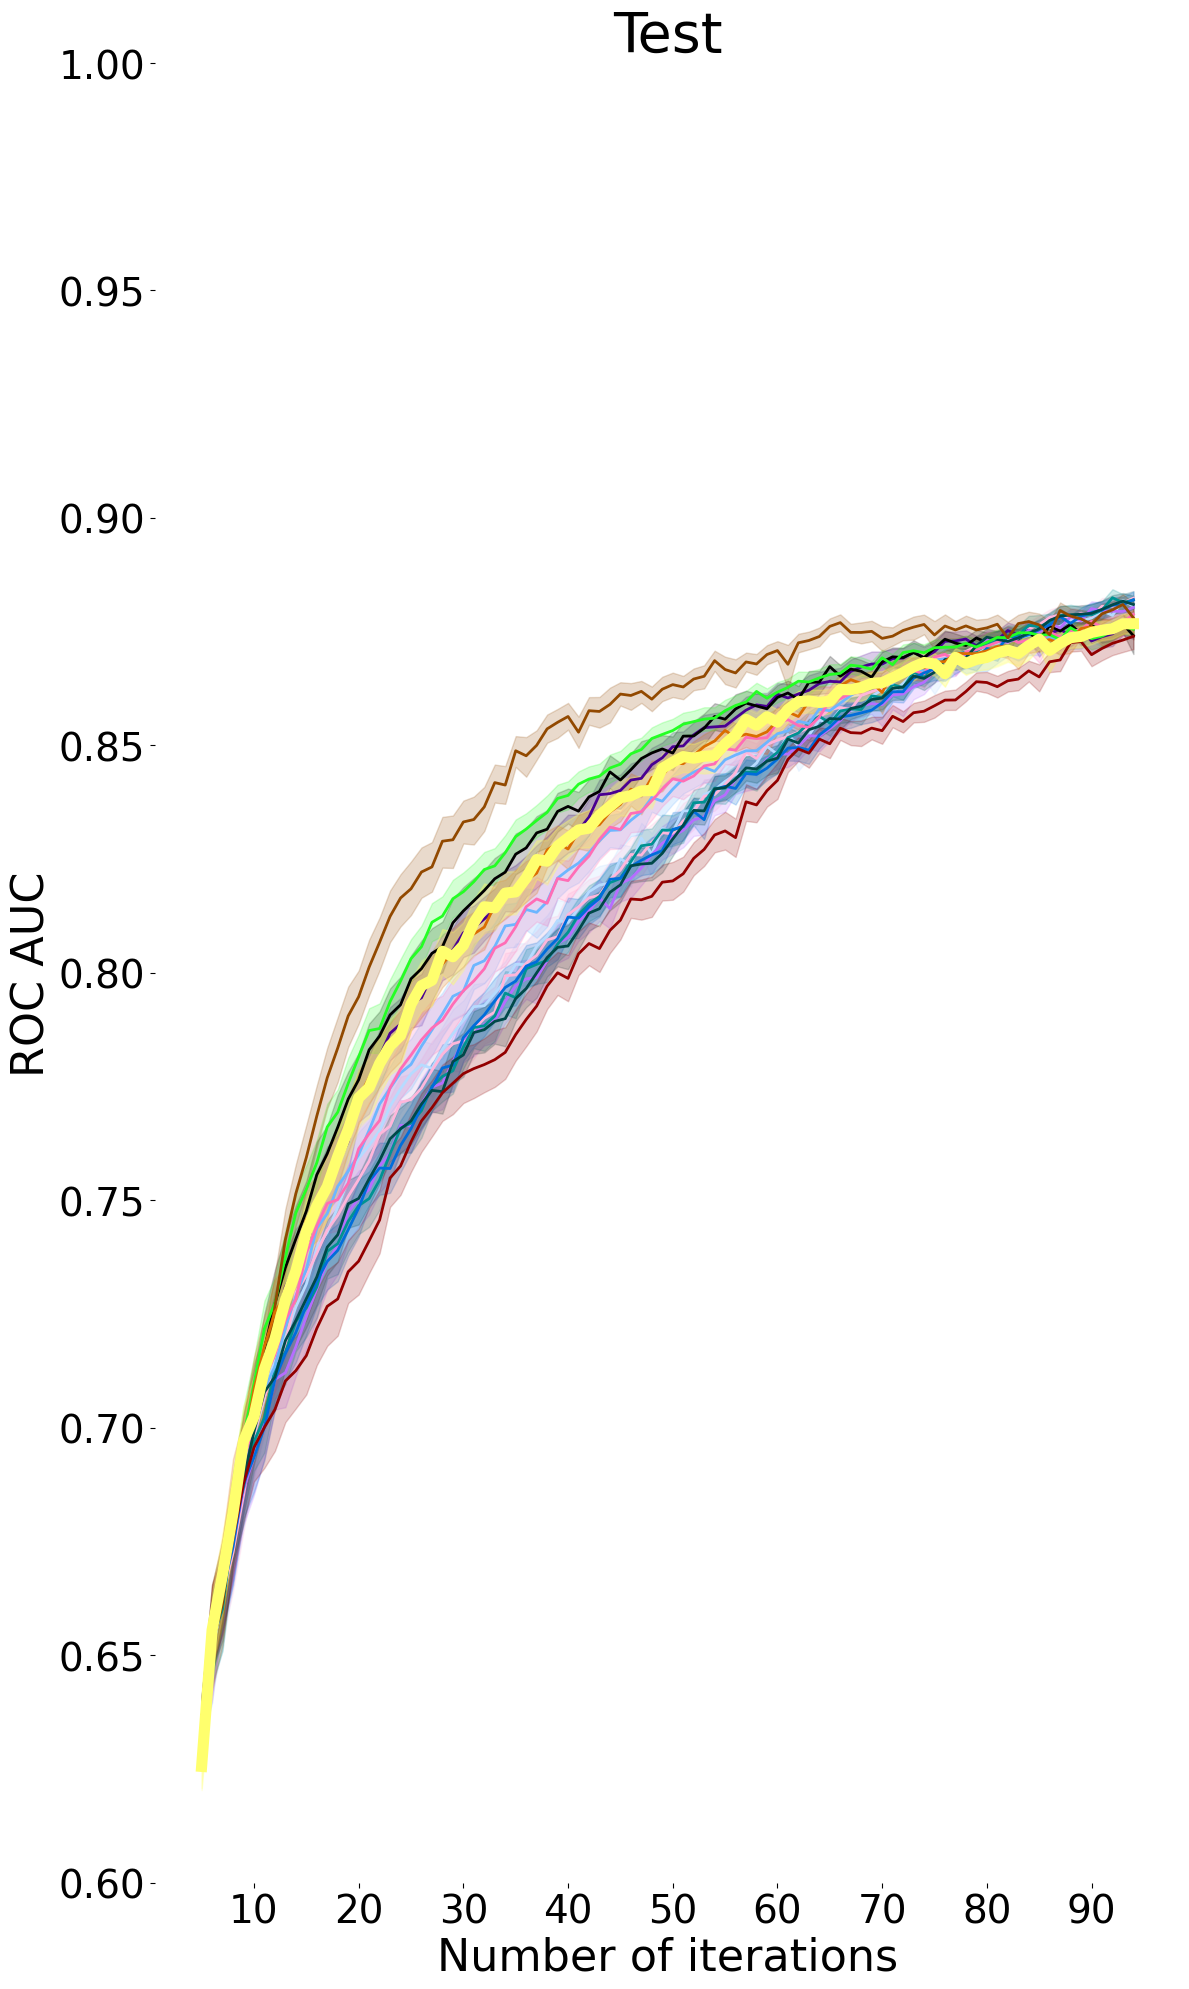

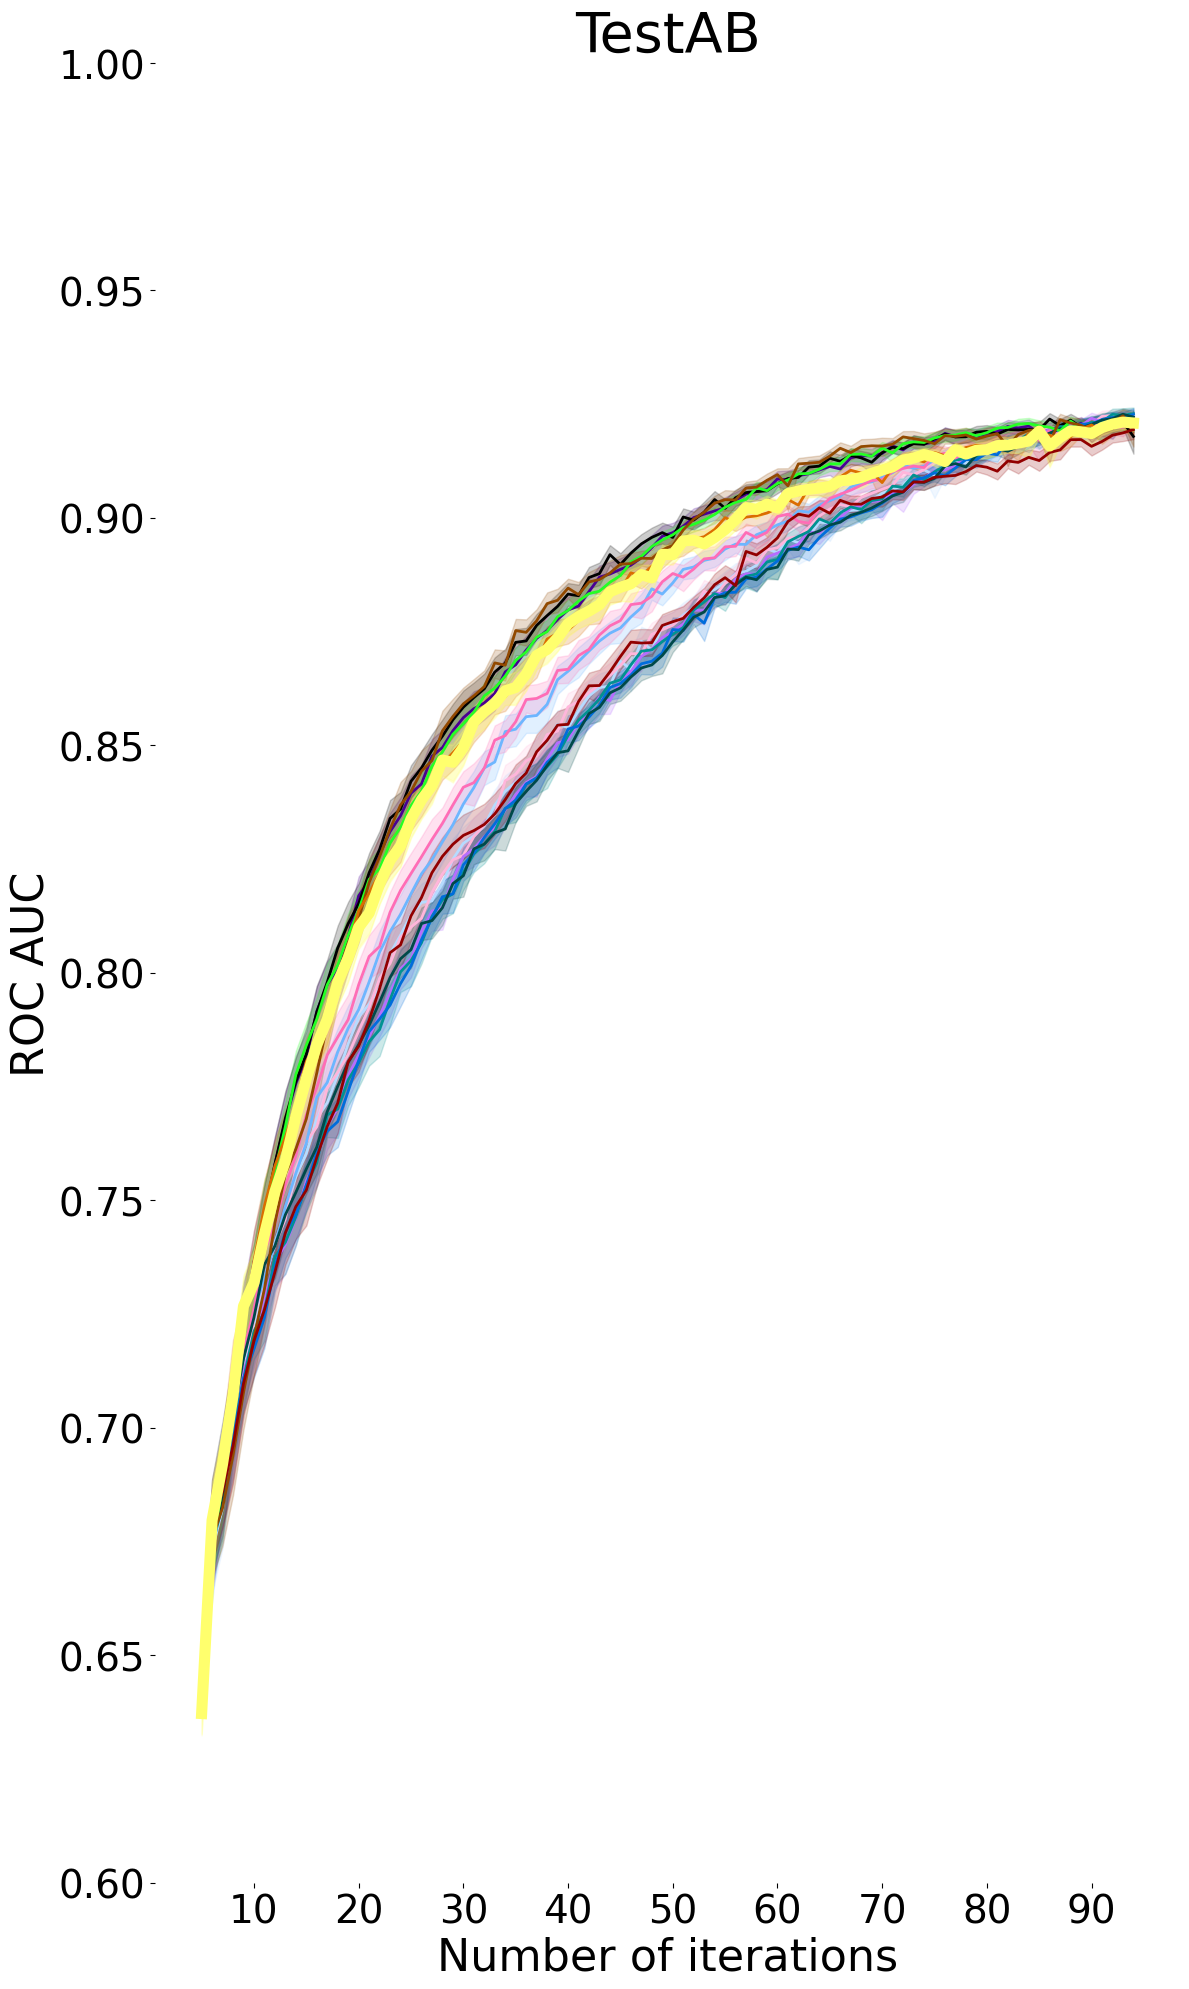

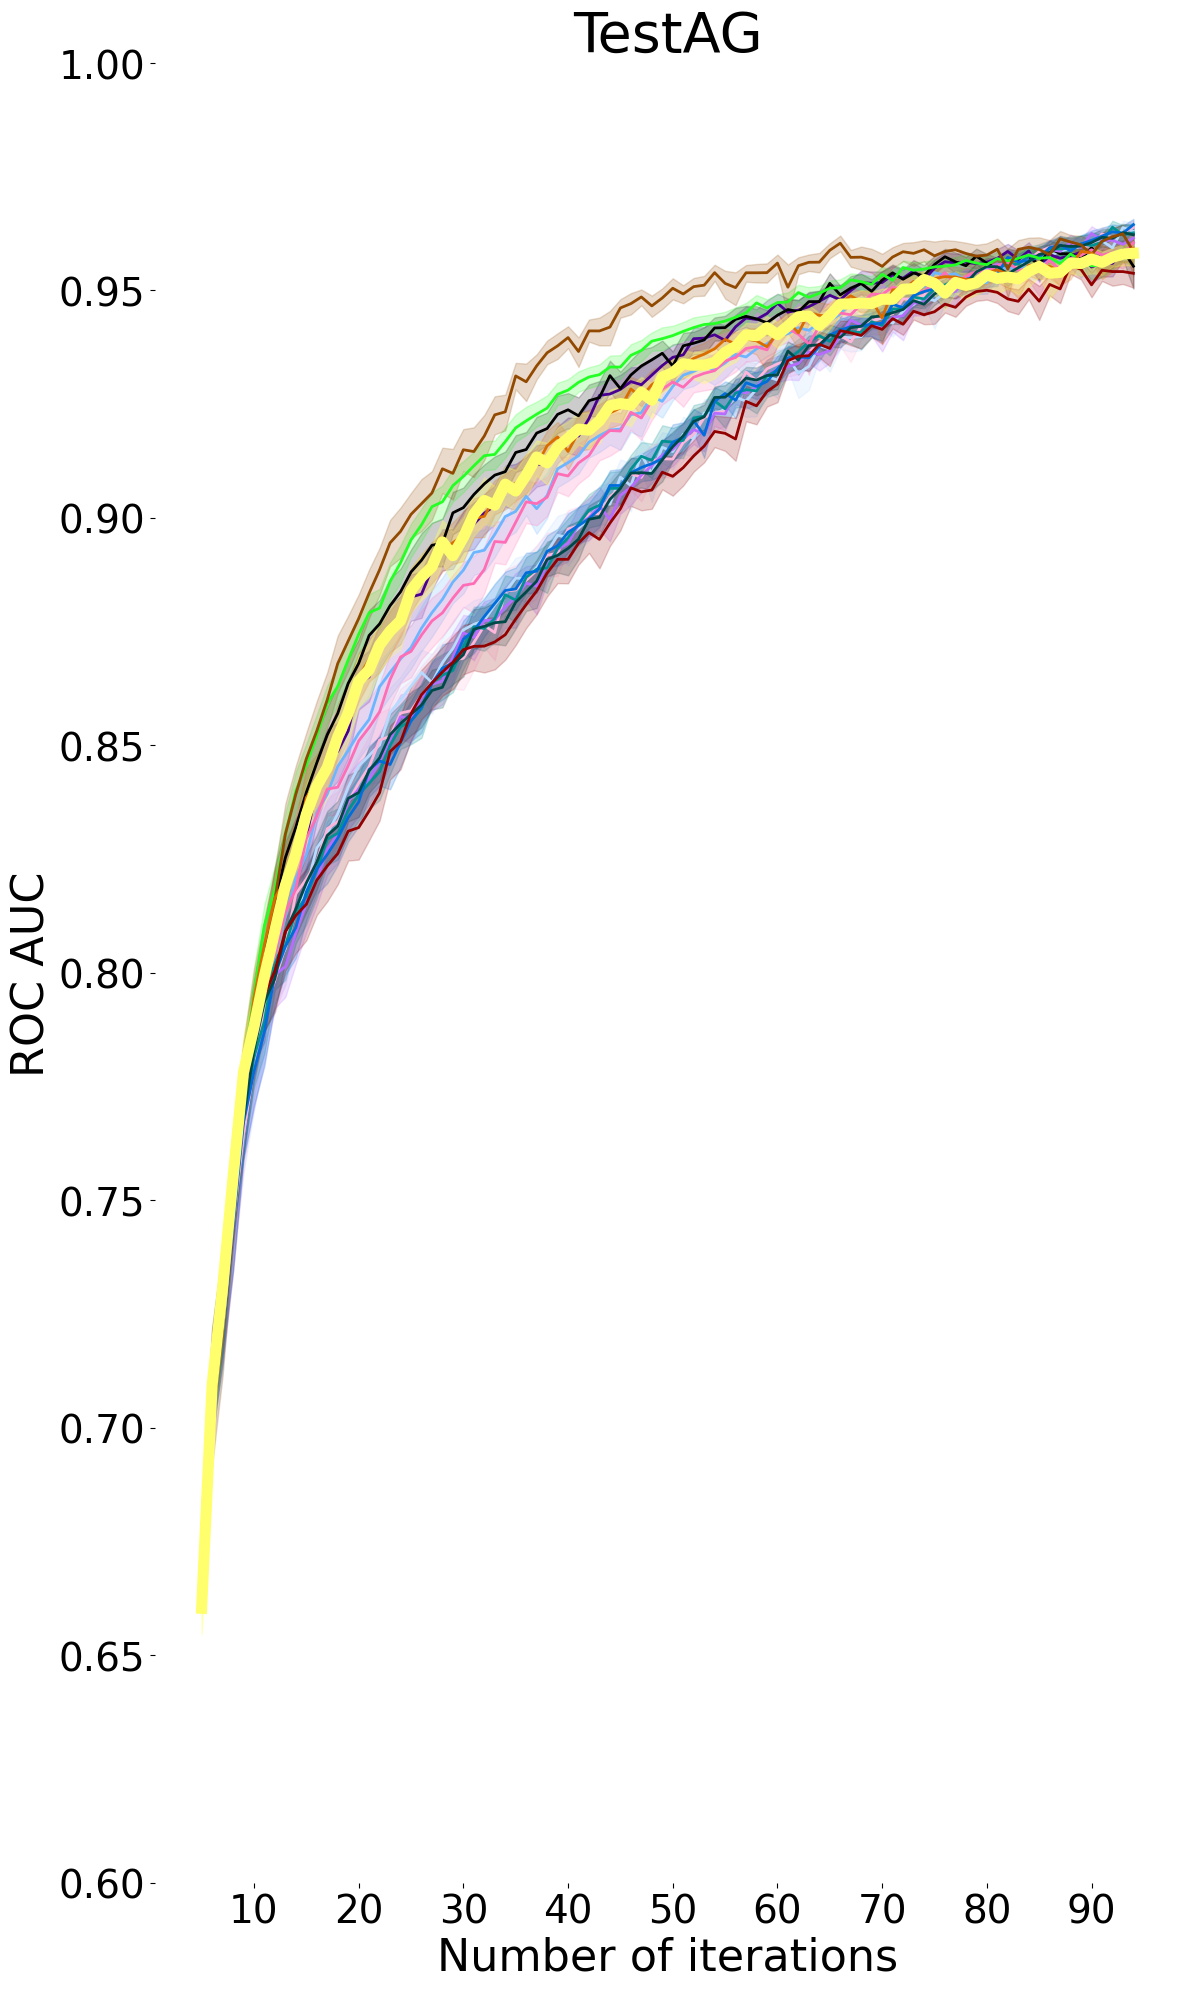

In [3]:
plot_three_graphs(result2, result3, outdir=output_dir, order=2)